In [364]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

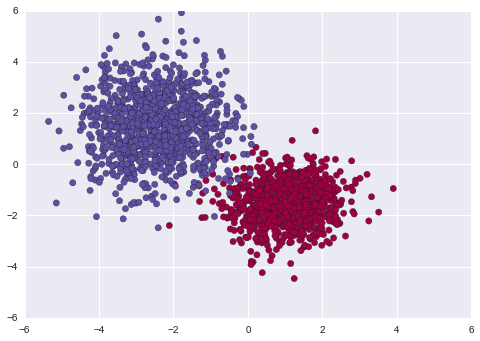

In [365]:
width=6
n = 1000 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((n*K,D)) # data matrix (each row = single example)
y = np.zeros(n*K, dtype='uint8') # class labels

X1 = (0.8)*np.random.randn(n,D)+np.array([1,-1.5])
X2 = np.array([1,1.3])*np.random.randn(n,D)+np.array([-2.5,1.5])
X = np.vstack((X1, X2))
y = np.hstack((np.zeros(n), np.ones(n)))
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1*width,width])
plt.ylim([-1*width,width])

x_train = X
y_train = y

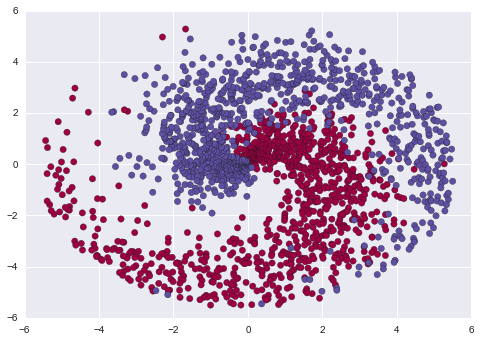

In [366]:
width=6
n = 1000 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((n*K,D)) # data matrix (each row = single example)
y = np.zeros(n*K, dtype='uint8') # class labels
for j in xrange(K):
    ix = range(n*j,n*(j+1))
    r = 5.6*np.linspace(0.0,1,n) # radius
    t = np.linspace(j*4,(j+1)*4,n) + np.random.randn(n)*0.69 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1*width,width])
plt.ylim([-1*width,width])

x_train = X
y_train = y



In [367]:
y_train = y_train.astype('uint8')

In [368]:
import theano
from theano import tensor

# Size of the data
n_in = D
# Number of classes
n_out = K

x = tensor.matrix('x')
W = theano.shared(value=np.ones((n_in, n_out), dtype=theano.config.floatX),
                  name='W',
                  borrow=True)
b = theano.shared(value=np.zeros((n_out,), dtype=theano.config.floatX),
                  name='b',
                  borrow=True)

In [369]:
p_y_given_x = tensor.nnet.softmax(tensor.dot(x, W) + b)

In [370]:
y = tensor.lvector('y')
adj_prob = p_y_given_x[tensor.arange(y.shape[0]), y]
log_prob = tensor.log(adj_prob)
log_like = log_prob.mean()

In [371]:
#y = tensor.lvector('y')
#log_prob = tensor.log(p_y_given_x)
#adj_prob = log_prob[tensor.arange(y.shape[0]), y]
#log_like = adj_prob.sum()

In [372]:
g_W, g_b = theano.grad(cost=log_like, wrt=[W, b])

In [373]:
learning_rate = np.float32(0.15)
new_W = W + learning_rate * g_W
new_b = b + learning_rate * g_b

In [374]:
train_model = theano.function(inputs=[x, y],
                              outputs=log_like,
                              updates=[(W, new_W),
                                       (b, new_b)])

In [375]:
import timeit
#from six.moves import xrange

start_time = timeit.default_timer()

n_epochs = 3500000
epoch = 0
while (epoch < n_epochs):
    
    #for minibatch_index in xrange(n_train_batches):
        #minibatch_x, minibatch_y = get_minibatch(minibatch_index, x_train, y_train)
        #minibatch_x, minibatch_y = get_random_minibatch(x_train, y_train)
        
        #TRAIN ON THE MINIBATCH
        #minibatch_avg_cost = train_model(minibatch_x, minibatch_y)
    #cst = train_model(x_train, y_train)    
    inds = np.random.randint(0, x_train.shape[0], 50)
    xx = x_train[inds, :]
    yy = y_train[inds]
    cst = train_model(xx, yy)
    

    
    if epoch%100000==0:
        learning_rate = learning_rate/2.0
        print learning_rate
        print("log_like: %f" % cst)
        #print W.get_value()
        #print b.get_value()
        print "---------------------"
    epoch = epoch + 1
    
end_time = timeit.default_timer()


print('The code ran for %d epochs, with %f epochs/sec' %
      (epoch, 1. * epoch / (end_time - start_time)))

0.0750000029802
log_like: -0.693147
---------------------
0.0375000014901
log_like: -0.468561
---------------------
0.0187500007451
log_like: -0.596393
---------------------
0.00937500037253
log_like: -0.433735
---------------------
0.00468750018626
log_like: -0.476762
---------------------
0.00234375009313
log_like: -0.394780
---------------------
0.00117187504657
log_like: -0.450449
---------------------
0.000585937523283
log_like: -0.486999
---------------------
0.000292968761642
log_like: -0.539373
---------------------
0.000146484380821
log_like: -0.497225
---------------------
7.32421904104e-05
log_like: -0.475599
---------------------
3.66210952052e-05
log_like: -0.471778
---------------------
1.83105476026e-05
log_like: -0.493507
---------------------
9.1552738013e-06
log_like: -0.508190
---------------------
4.57763690065e-06
log_like: -0.576386
---------------------
2.28881845032e-06
log_like: -0.552961
---------------------
1.14440922516e-06
log_like: -0.678156
-------------

In [376]:
train_model(x_train, y_train)    

array(-0.5251928697422696)

In [377]:
print W.get_value()
print b.get_value()

[[ 0.97486826  1.02513174]
 [ 0.6906828   1.3093172 ]]
[ 0.06127411 -0.06127411]


In [378]:
w_opt = np.array(W.get_value()[:, 1])
b_opt = np.array([b.get_value()[1]])

print w_opt
print b_opt

[ 1.02513174  1.3093172 ]
[-0.06127411]


In [379]:
def plotIt(x_train, y_train, x_test, y_test):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)

    colors = np.array(["blue", "orange"])
    #plot training data:
    plt.scatter(x_train[:, 0], x_train[:, 1], color = colors[y_train.astype(int)], marker='o', alpha=1, s=40)
    #plot test data:
    plt.scatter(x_test[:, 0], x_test[:, 1], color = colors[y_test.astype(int)], marker='.', alpha=0.15, s=15)

    plt.xlim([-1*width,width])
    plt.ylim([-1*width,width])

In [380]:
N=2*n
x_test = np.array([0,0])
for xx in np.linspace(-1*width, width, 200):
    for yy in np.linspace(-1*width, width, 200):
        x_test = np.vstack((x_test, np.array([xx,yy])))
        
x_test = np.delete(x_test, (0), axis=0)

In [381]:
#w,x are vectors
def P(w, b, x):
    return 1.0/(1+np.exp(-1*np.sum(w*x, axis=1)-b))

In [382]:
y_test = P(w_opt, b_opt, x_test)

print y_test

[  7.76888880e-07   8.40713609e-07   9.09781806e-07 ...,   9.99998972e-01
   9.99999050e-01   9.99999122e-01]


In [383]:
y_test[y_test>=0.5]=1
print y_test
y_test[y_test<0.5]=0
print y_test

[  7.76888880e-07   8.40713609e-07   9.09781806e-07 ...,   1.00000000e+00
   1.00000000e+00   1.00000000e+00]
[ 0.  0.  0. ...,  1.  1.  1.]


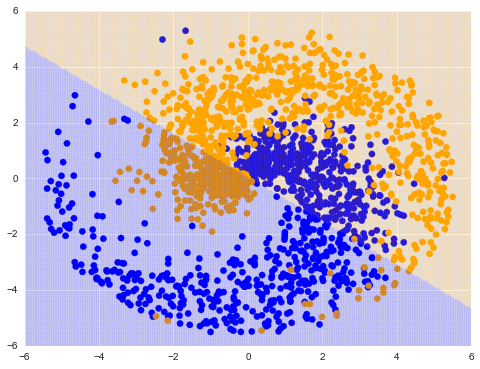

In [384]:
plotIt(x_train, y_train, x_test, y_test)

In [388]:
from sklearn.linear_model import LogisticRegression

LGSTC = LogisticRegression(solver = "liblinear")
LGSTC.fit(x_train, np.ravel(y_train))
beta_LGSTC = LGSTC.coef_.T
y_testLogistic = LGSTC.predict(x_test)

print beta_LGSTC

[[-0.02489067]
 [ 0.64953063]]


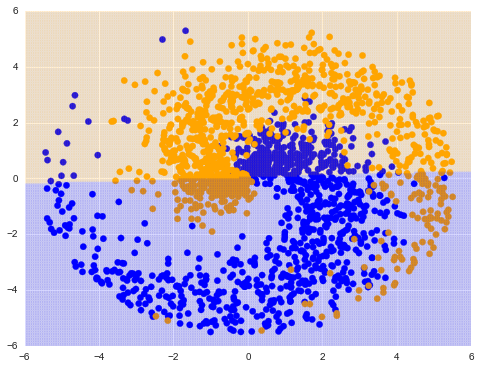

In [389]:
plotIt(x_train, y_train, x_test, y_testLogistic)